In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
# from collections import defaultdict
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/kulyah/Datasets/dataset_twitter/data_tweet_tayangan_tv[bersih].csv")
df.head(10)

,Sentiment,tweet_bersih
0,positive,undang hitamputih menang ssk jkt mjkt layak un...
1,positive,selamat buka puasa moga amal ibadah ni terima ...
2,positive,nih trans hitam putih dpt harga norwegia
3,positive,selamat mas hitamputih
4,positive,asiknya nonton hitam putih trans
5,positive,acara komplit tarik hitam putih
6,positive,hitam putih inspiratif banget
7,positive,suka banget acara hitam putih
8,positive,keren lu bro
9,positive,yg liat hitam putih trans ga sanggu ganteng


In [ ]:
df.rename(columns={'tweet_bersih':'tweets', 'Sentiment':'label'}, inplace=True)
df.head()

,label,tweets
0,positive,undang hitamputih menang ssk jkt mjkt layak un...
1,positive,selamat buka puasa moga amal ibadah ni terima ...
2,positive,nih trans hitam putih dpt harga norwegia
3,positive,selamat mas hitamputih
4,positive,asiknya nonton hitam putih trans


In [ ]:
# label encoder
df['label'] = df['label'].replace(['positive', 'negative'], ['1', '0'])
df.head()

,label,tweets
0,1,undang hitamputih menang ssk jkt mjkt layak un...
1,1,selamat buka puasa moga amal ibadah ni terima ...
2,1,nih trans hitam putih dpt harga norwegia
3,1,selamat mas hitamputih
4,1,asiknya nonton hitam putih trans


SVM test Accuracy:  0.85
CM SVM [[59  7]
 [11 43]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        66
           1       0.86      0.80      0.83        54

    accuracy                           0.85       120
   macro avg       0.85      0.85      0.85       120
weighted avg       0.85      0.85      0.85       120



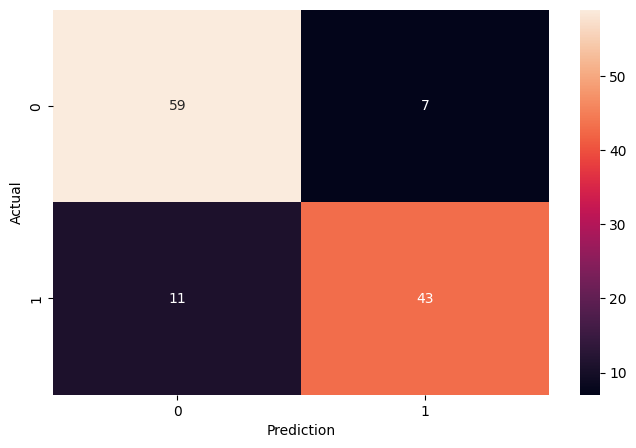

In [ ]:
# split data into test and training
train_x, test_x, train_y, test_y = model_selection.train_test_split(df['tweets'], df['label'], test_size=0.3)
# convert string to numerical
encoder = LabelEncoder()
train_y = encoder.fit_transform(train_y)
test_y = encoder.fit_transform(test_y)

tfidf_vect = TfidfVectorizer(max_features=5000)
tfidf_vect.fit_transform(df['tweets'])

train_x_tfidf = tfidf_vect.transform(train_x)
test_x_tfidf = tfidf_vect.transform(test_x)

# metode SVM
from sklearn.svm import SVC
classifierSVM = SVC(kernel = 'linear', random_state=0)
classifierSVM.fit(train_x_tfidf, train_y)

y_pred_sum = classifierSVM.predict(test_x_tfidf)

print("SVM test Accuracy: ", accuracy_score(test_y, y_pred_sum))

from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(test_y, y_pred_sum)

print('CM SVM', cm_svm)

from sklearn.metrics import classification_report
print(classification_report(test_y, y_pred_sum))

import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize = (8,5))
sns.heatmap(confusion_matrix(test_y, y_pred_sum), annot = True, fmt=".0f", ax=ax)
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pickle
with open('model_sentiment_analysis.pkl', 'wb') as f:
    pickle.dump(classifierSVM, f)

#Proses pembuatan aplikasi sederhana sentiment analysis

In [ ]:
def get_data():
  return df

In [ ]:
def data_prepare():
  col = ['label', 'tweets']
  y = get_data()
  y = y[col]
  y = y[pd.notnull(y['tweets'])]
  y.columns = ['label','tweets']
  y['category_id'] = y['label'].factorize()[0]
  category_id_df = y[['label','category_id']].drop_duplicates().sort_values('category_id')
  category_to_id = dict(category_id_df.values)
  id_to_category = dict(category_id_df[['category_id','label']].values)
  return y

In [ ]:
def svm_algo():
  tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1,2))
  df = data_prepare()
  features = tfidf.fit_transform(df.tweets).toarray()
  labels = df.category_id
  features.shape
  X_train, X_test, y_train, y_test = train_test_split(df['tweets'], df['label'], random_state = 0, test_size=0.2)
  count_vect = CountVectorizer()
  X_train_count = count_vect.fit_transform(X_train)
  tfidf_transformer = TfidfTransformer()
  X_train_tfidf = tfidf_transformer.fit_transform(X_train_count)
  model = pickle.load(open('model_sentiment_analysis.pkl', 'rb'))
  clf = model.fit(X_train_tfidf, y_train)
  return clf,count_vect

In [ ]:
def predict(sentiment):
  clf, count_vect = svm_algo()
  sentences = clf.predict(count_vect.transform([sentiment]))
  sentences = str(sentences).strip("['']")
  return sentences

In [ ]:
ques = input("Input : ")
x = predict(str(ques))
sentences = str(x).strip("['']")
sentencesClass = {
    '0' : ['negatif'],
    '1' : ['positif'],
}

def get_sentencesClass(sentences):
  return sentencesClass[sentences]

msg= get_sentencesClass(sentences)
print(ques,msg)

Input : kurang si menurut gw
kurang si menurut gw ['negatif']
